In [4]:
# csv 파일 쓰기
import csv
with open("output.csv", "w", newline="") as file:
    write = csv.writer(file)
    write.writerow(["Name", "Age", "City"])
    write.writerow(["Alice", 25, "Seoul"])
    write.writerow(["Bob", 30, "Busan"])

In [5]:
# csv 파일 읽기
with open("output.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

['Name', 'Age', 'City']
['Alice', '25', 'Seoul']
['Bob', '30', 'Busan']


In [6]:
# dictionary 활용한 csv 파일 쓰기
header = ["Name", "Age", "City"]
data1 = {"Name":"Charlie", "Age":28, "City":"Incheon"}
with open("output_dict.csv", "w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=header)
    writer.writerow(data1)

with open("output_dict.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

['Charlie', '28', 'Incheon']


In [9]:
# csv를 dictionary 형태로 읽기
with open("output.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        print(row)

# output.csv 안에 사람 중
# 30살 이상인 사람이 사는 도시는?
with open("output.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if int(row["Age"]) >= 30:
            print(row["City"])

{'Name': 'Alice', 'Age': '25', 'City': 'Seoul'}
{'Name': 'Bob', 'Age': '30', 'City': 'Busan'}
Busan


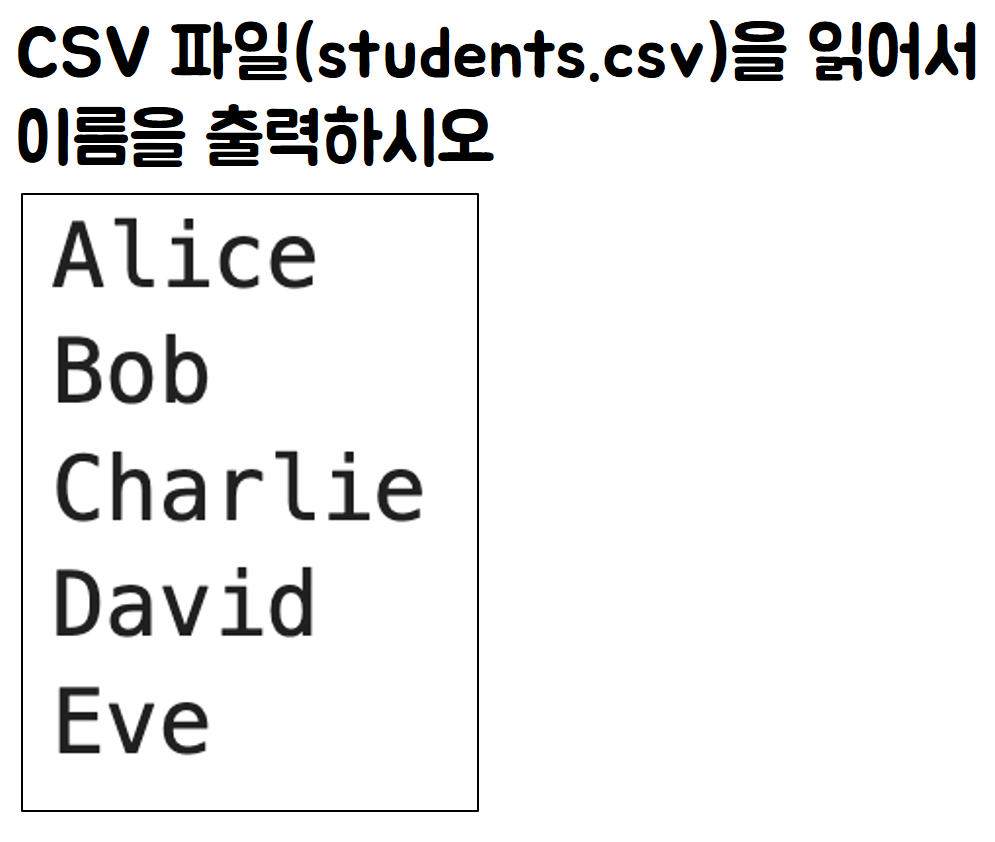

In [25]:
with open("students.csv", "r") as file:
    # reader는 한 번만 호출!!
    reader = list(csv.reader(file))
    index = reader[0].index("Name")
    for i, row in enumerate(reader):
        if i != 0:
            print(row[index])

Alice
Bob
Charlie
David
Eve


In [28]:
with open("students.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        print(row["Name"])

Alice
Bob
Charlie
David
Eve


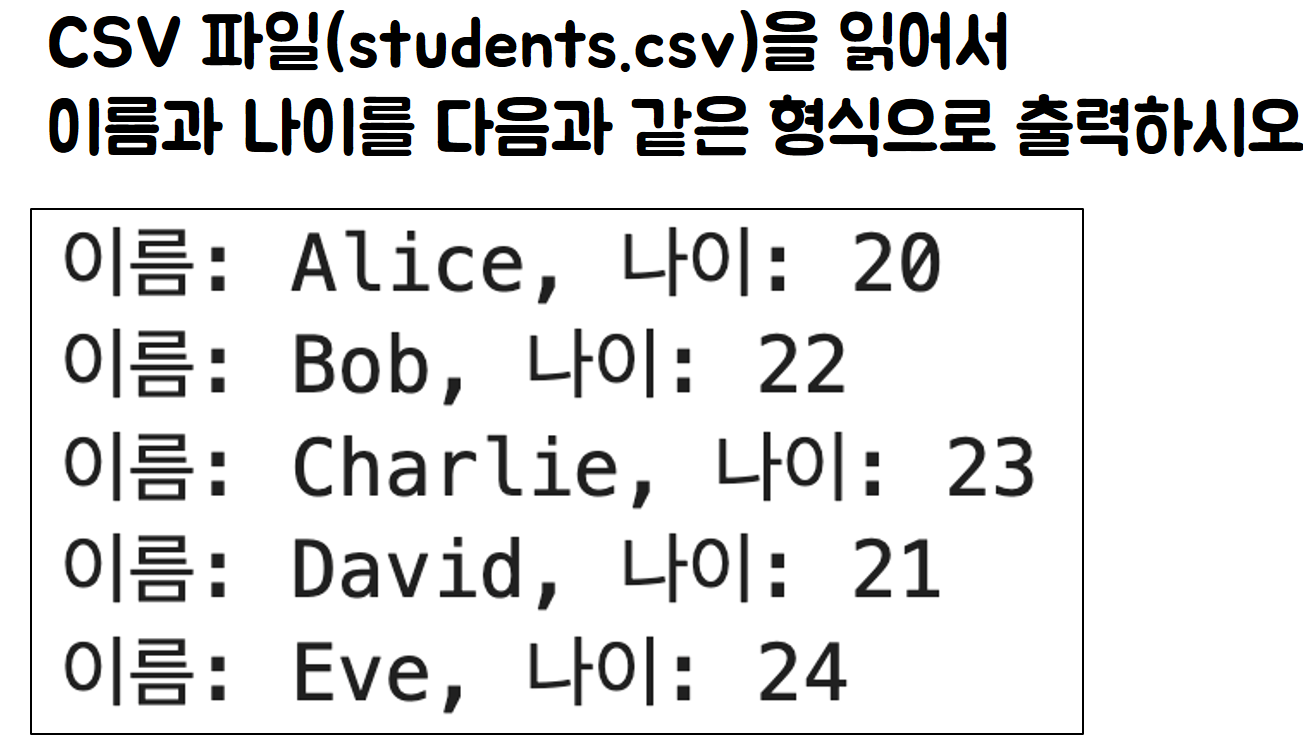

In [ ]:
with open("students.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        print("이름: %s, 나이: %s"%(row["Name"], row["Age"]))
        print("이름: {}, 나이: {}".format(row["Name"], row["Age"]))
        print(f'이름: {row["Name"]}, 나이: {row["Age"]}')

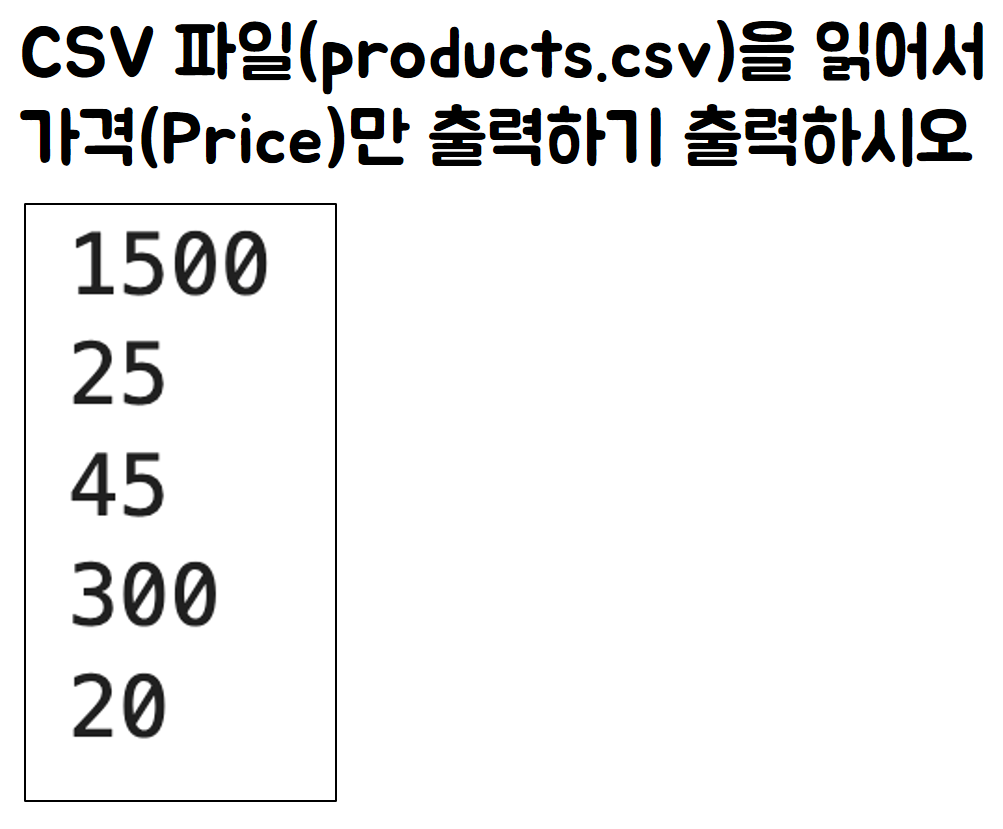

In [46]:
with open("products.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        print(row["Price"])

1500
25
45
300
20


In [60]:
with open("SEOUL_CULTURE_202301_202308.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if "문화센터" in row["공연/행사명"]:
            print(row["공연/행사명"])
            print(row["날짜/시간"])
            print(row["장소"])
            print()

[돌곶이생활예술문화센터] 8월 식물놀이터 여름, 잎사귀편
2023-08-19~2023-08-19
돌곶이생활예술문화센터 1층 커뮤니티 라운지

[서울생활문화센터 체부] 2023 체부 생활문화아카데미 특강
2023-08-03~2023-08-16
서울생활문화센터 체부 체부홀

2023 생활문화센터 활성화 지원 주말엔 생활문화센터로 [뜻밖의 생활문화]
2023-07-29~2023-07-29
 서울생활문화센터 체부 금오재

[서울생활문화센터 낙원] 2023 낙원 속 생활문화 클래스 '나만의 전통공예 일일체험수업'
2023-07-04~2023-08-19
서울생활문화센터 낙원 강의실 (2번)

[성북문화재단] 돌곶이생활예술문화센터 우쿨렐레 초중급
2023-07-11~2023-08-01
돌곶이생활예술문화센터 1층

[북촌문화센터] 6월 북촌도락
2023-06-10~2023-06-17
북촌문화센터 북촌한옥청 북촌 일대

[서울생활문화센터 체부] 원데이클래스 6월 앙금플라워
2023-06-02~2023-06-16
서울생활문화센터 체부 체부홀

[돌곶이생활예술문화센터] 우리의 소리, 우리의 동작
2023-06-02~2023-06-17
돌곶이생활예술문화센터 지하 1층 움직임 연습실

[서울생활문화센터 신도림] 나를 돌보는 식물
2023-06-03~2023-06-04
서울생활문회센터 신도림

[돌곶이생활예술문화센터] 전통부채춤 배워보기
2023-05-15~2023-05-18
서울시 성북구 화랑로32길 100-1, 지하1층 움직임연습실 (돌곶이생활예술문화센터)

[북촌문화센터] 4월의 북촌도락 '개화하다, 북촌'
2023-04-15~2023-04-22
북촌문화센터 및 북촌 일대

[서울생활문화센터 체부] 원데이클래스 체부동 아틀리에 도자그림 그리기 참여자 모집
2023-04-07~2023-04-18
서울생활문화센터 체부 체부홀

서울생활문화센터 서교 음악강좌 
2023-03-15~2023-06-01
서울생활문화센터 서교 연습실, 강의실, 다목적실



In [65]:
# 동일한 정보를 담고 있는 
# csv merge 
# "file1.csv", "file2.csv"
file_list = ["file1.csv", "file2.csv"]

with open("merge.csv", "w", newline="") as outfile:

    writer = None # wirter 초기화
    
    for filename in file_list:
        with open(filename, "r") as infile:
            reader = csv.DictReader(infile)

            if writer == None:
                writer = csv.DictWriter(outfile, fieldnames=reader.fieldnames)
                # 병합 시 header 적용
                writer.writeheader()
            for row in reader:
                writer.writerow(row)

In [66]:
with open("merge.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        print(row)

{'ID': '1', 'Name': 'Alice', 'Score': '85'}
{'ID': '2', 'Name': 'Bob', 'Score': '90'}
{'ID': '3', 'Name': 'Charlie', 'Score': '75'}
{'ID': '4', 'Name': 'David', 'Score': '88'}


In [ ]:
# merge.csv에서 Score가 80이상인 사람들의 이름을 출력!
# 80점 이상인 사람들
# Alice, Bob, David

In [74]:
with open("merge.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if int(row["Score"]) >= 80:
            print(row["Name"], end=", ")

Alice, Bob, David, 

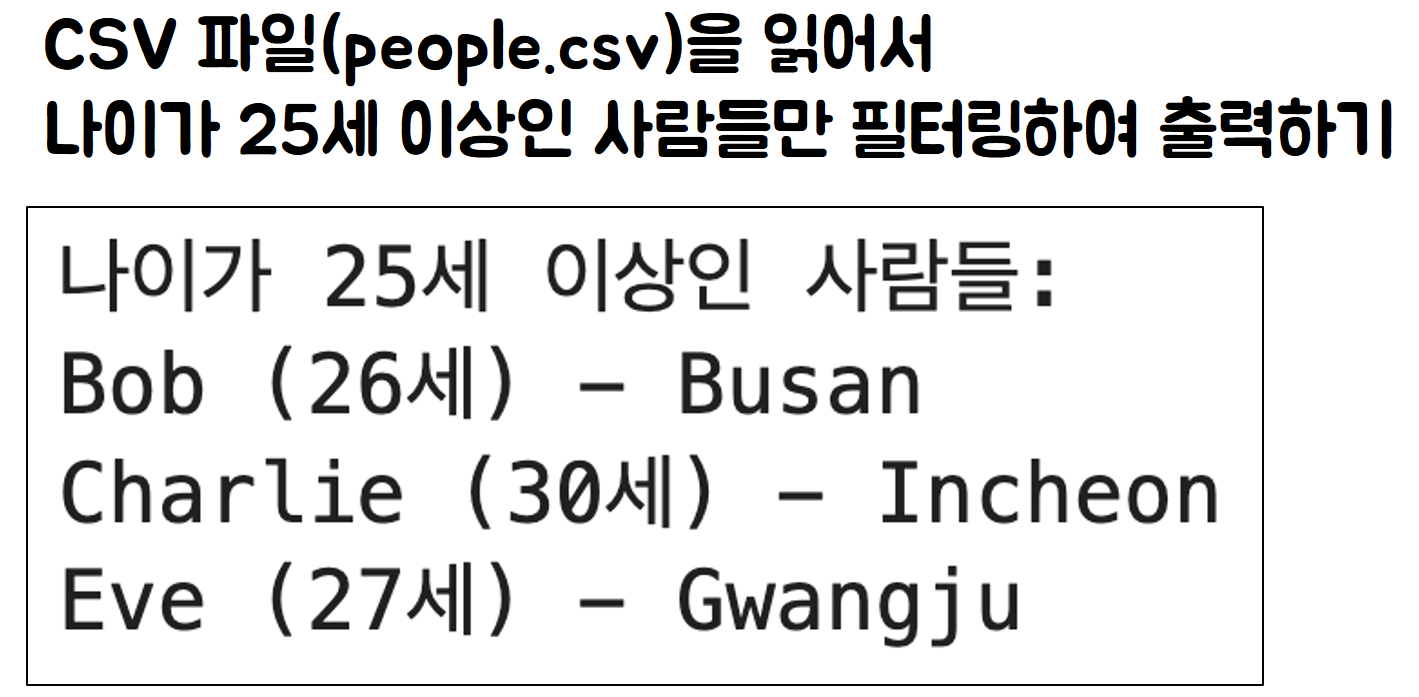


In [78]:
with open("people.csv", "r") as file:
    reader = csv.DictReader(file)
    print("나이가 25세 이상인 사람들")
    for row in reader:
        if int(row["Age"]) >= 25:
            print(f'{row["Name"]} ({row["Age"]}세) - {row["City"]}')

나이가 25세 이상인 사람들
Bob (26세) - Busan
Charlie (30세) - Incheon
Eve (27세) - Gwangju


In [82]:
with open("BUS_STATION_BOARDING_MONTH_202501.csv", "r") as file:
    reader = csv.DictReader(file)
    # print(len(list(reader)))
    check = 1
    for row in reader:
        if check <= 100:
            print(row["노선명"], row["승차총승객수"])
            check += 1

400번(염곡동~시청) 78
703번(탄현역~숭례문) 119
703번(탄현역~숭례문) 14
703번(탄현역~숭례문) 26
703번(탄현역~숭례문) 46
703번(탄현역~숭례문) 11
703번(탄현역~숭례문) 42
703번(탄현역~숭례문) 56
703번(탄현역~숭례문) 28
703번(탄현역~숭례문) 48
703번(탄현역~숭례문) 9
703번(탄현역~숭례문) 15
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 3
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 46
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 0
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 0
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 20
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 56
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 14
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 10
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 54
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 20
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 0
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 0
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 0
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 99
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 4
9401-1번(푸른마을~서울시중부기술교육원.블루스퀘어) 122
9409번(구미동차고지~신사역) 3
9409번(구미동차고지~신사역) 2
9409번(구미동차고지~신사역) 4
9409번(구미동차고지~신사역) 2
9409번(구미동차고지~신사역) 3
9409번(구미동차고지~신사역) 2
9409번(구미동차고지~신사역) 1
9409번(구미동차고지~신사역) 4
9409번(구미동차고지~신사역) 2
9409번(구미동차고지~신사역) 4
9409번(구미동차고지~신사역) 1
9409번(구미동차고지~신사역) 1
9409번(구미동차고지~신사역) 0

- Json(JavaScript Object Notation)

In [85]:
import json

# json 파일 읽기
with open("data.json", "r") as file:
    data = json.load(file)
    print(data)

{'name': 'Alice', 'age': 25, 'city': 'Seoul', 'isStudent': False, 'skills': ['Python', 'JavaScript', 'SQL']}


In [91]:
data2 = {"Name":"Bob",
        "Age":25,
        "City":"Busan"}

with open("output.json", "w") as file:
    json.dump(data2, file, indent=4)

In [89]:
with open("output.json", "r") as file:
    data = json.load(file)
    print(data)

{'Name': 'Bob', 'Age': 25, 'City': 'Busan'}


In [94]:
data3 = {"Name":"나예호", "Age":20, "mbti":"ENFJ"}
json_data3 = json.dumps(data3, ensure_ascii=False)
print(json_data3)

{"Name": "나예호", "Age": 20, "mbti": "ENFJ"}


In [ ]:
# people.json을 읽어서
# 다음과 같이 출력
# ...
# 이름: David, 나이: 35
# ...

In [98]:
with open("people.json", "r") as file:
    data = json.load(file)
    for row in data:
        print(f'이름: {row["name"]}, 나이: {row["age"]}')

이름: Alice, 나이: 25
이름: Bob, 나이: 32
이름: Charlie, 나이: 29
이름: David, 나이: 35


In [103]:
with open("nested.json", "r") as file:
    data = json.load(file)
    phone = data["employee"]["contact"]["phone"]
    print(f"연락처 : {phone}")

# 다음과 같이 출력하시오
# 연락처 : 123-4567

연락처 : 123-4567


In [113]:
with open("people.json", "r") as file:
    data = json.load(file)

    cities = []
    for row in data:
        cities.append(row["city"])

    print(cities)

with open("cities.json", "w") as file:
    json.dump(cities, file, indent=4)

print("도시 이름이 'cities.json' 파일로 저장되었습니다.")

['Seoul', 'Busan', 'Incheon', 'Daegu']
도시 이름이 'cities.json' 파일로 저장되었습니다.


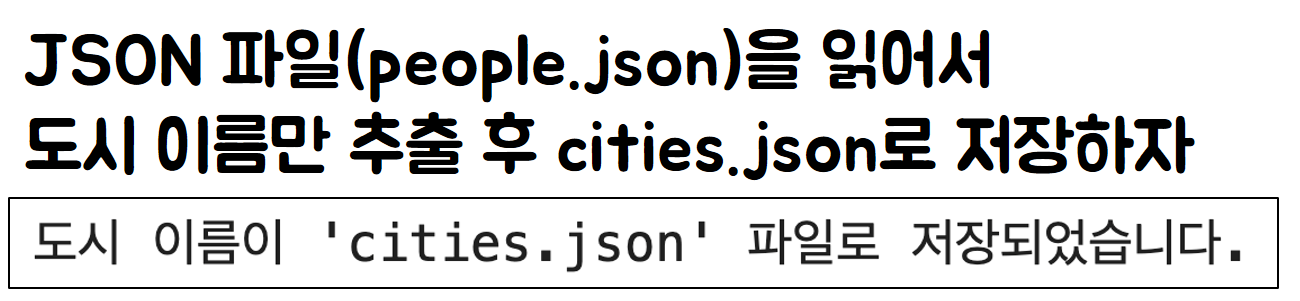
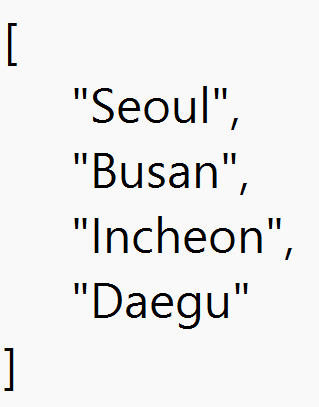